In [36]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import files

In [37]:
files.upload()

Saving 2019.csv to 2019 (4).csv


{'2019.csv': b"Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank\n1,Christian McCaffrey*\\McCaCh01,CAR,RB,23,16,16,0,2,0,0,0,287,1387,4.83,15,142,116,1005,8.66,4,1,0,19,1,,355,471.2,477.2,413.2,215,1,1\n2,Lamar Jackson*\\JackLa00,BAL,QB,22,15,15,265,401,3127,36,6,176,1206,6.85,7,0,0,0,,0,9,2,7,,1,418,417.7,431.7,423.7,152,1,2\n3,Derrick Henry*\\HenrDe00,TEN,RB,25,15,15,0,0,0,0,0,303,1540,5.08,16,24,18,206,11.44,2,5,3,18,,,277,294.6,303.6,285.6,136,2,3\n4,Aaron Jones\\JoneAa00,GNB,RB,25,16,16,0,0,0,0,0,236,1084,4.59,16,68,49,474,9.67,3,3,2,19,,,266,314.8,322.8,290.3,125,3,4\n5,Ezekiel Elliott*\\ElliEz00,DAL,RB,24,16,16,0,0,0,0,0,301,1357,4.51,12,71,54,420,7.78,2,3,2,14,,,258,311.7,319.7,284.7,117,4,5\n6,Dalvin Cook*\\CookDa01,MIN,RB,24,14,14,0,0,0,0,0,250,1135,4.54,13,63,53,519,9.79,0,4,2,13,,,239,292.4,300.4,265.9,99,5,6\n7,Michael Thomas*\\ThomMi05,NOR,WR,26,16,15,0,0,0,0,0,1,-9,-9,0,185,149,172

In [38]:
df = pd.read_csv('2019.csv')
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 'GS'], axis=1, inplace=True)
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])
df.rename({
  'TD': 'PassingTD',
  'TD.1': 'RushingTD',
  'TD.2': 'ReceivingTD',
  'TD.3': 'TotalTD',
  'Yds': 'PassingYDs',
  'Yds.1': 'RushingYDs',
  'Yds.2': 'ReceivingYDs',
  'Att': 'PassingAtt',
  'Att.1': 'RushingAtt' 
}, axis=1, inplace=True)

rb_df = df[df['FantPos']=='RB']
qb_df = df[df['FantPos']=='QB']
wr_df = df[df['FantPos']=='WR']
te_df = df[df['FantPos']=='TE']
df

,Player,Tm,FantPos,Age,G,Cmp,PassingAtt,PassingYDs,PassingTD,Int,RushingAtt,RushingYDs,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,TotalTD
0,Christian McCaffrey,CAR,RB,23,16,0,2,0,0,0,287,1387,4.83,15,142,116,1005,8.66,4,0,19
1,Lamar Jackson,BAL,QB,22,15,265,401,3127,36,6,176,1206,6.85,7,0,0,0,NaN,0,2,7
2,Derrick Henry,TEN,RB,25,15,0,0,0,0,0,303,1540,5.08,16,24,18,206,11.44,2,3,18
3,Aaron Jones,GNB,RB,25,16,0,0,0,0,0,236,1084,4.59,16,68,49,474,9.67,3,2,19
4,Ezekiel Elliott,DAL,RB,24,16,0,0,0,0,0,301,1357,4.51,12,71,54,420,7.78,2,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Ray-Ray McCloud,CAR,NaN,23,6,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN,0,1,0
599,Darrius Shepherd,GNB,WR,24,6,0,0,0,0,0,0,0,NaN,0,2,1,1,1.00,0,1,0
600,Jarrett Stidham,NWE,QB,23,3,2,4,14,0,1,2,-2,-1.00,0,0,0,0,NaN,0,0,0
601,Michael Walker,JAX,WR,23,7,0,0,0,0,0,0,0,NaN,0,3,2,15,7.50,0,2,0


In [39]:
rushing_columns = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD',]
receiving_columns = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
passing_columns = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int']

def transform_columns(df, new_column_list):
  df = df[['Player', 'Tm', 'Age', 'G'] + new_column_list + ['FL']]
  return df

In [40]:
rb_df = transform_columns(rb_df, rushing_columns+receiving_columns)
wr_df = transform_columns(wr_df, rushing_columns+receiving_columns)
te_df = transform_columns(te_df, receiving_columns)
qb_df = transform_columns(qb_df, passing_columns)

rb_df.head()

,Player,Tm,Age,G,RushingAtt,RushingYDs,Y/A,RushingTD,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL
0,Christian McCaffrey,CAR,23,16,287,1387,4.83,15,142,116,1005,8.66,4,0
2,Derrick Henry,TEN,25,15,303,1540,5.08,16,24,18,206,11.44,2,3
3,Aaron Jones,GNB,25,16,236,1084,4.59,16,68,49,474,9.67,3,2
4,Ezekiel Elliott,DAL,24,16,301,1357,4.51,12,71,54,420,7.78,2,2
5,Dalvin Cook,MIN,24,14,250,1135,4.54,13,63,53,519,9.79,0,2


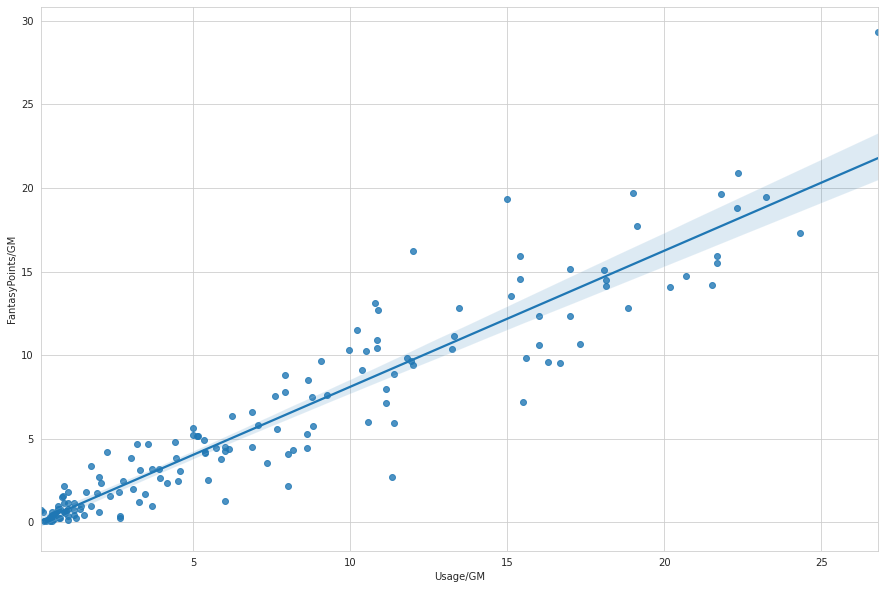

In [45]:
rb_df['FantasyPoints'] = rb_df['RushingYDs']*0.1 + rb_df['RushingTD']*6 + rb_df['Rec'] + rb_df['ReceivingYDs'] * 0.1 + rb_df['ReceivingTD'] * 6 -rb_df['FL']*2

rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints']/rb_df['G']
rb_df['FantasyPoints/GM'] = rb_df['FantasyPoints/GM'].apply(lambda x: round(x,2))

rb_df['Usage/GM'] = (rb_df['RushingAtt']+rb_df['Tgt'])/rb_df['G']
rb_df['Usage/GM'] = rb_df['Usage/GM'].apply(lambda x: round(x,2))

rb_df['RushingAtt/GM'] = rb_df['RushingAtt'] / rb_df['G']
rb_df['RushingAtt/GM'] = rb_df['RushingAtt/GM'].apply(lambda x: round(x,2))

sns.set_style('whitegrid')

fig, ax=plt.subplots()
fig.set_size_inches(15,10)

plot = sns.regplot(
    x=rb_df['Usage/GM'],
    y= rb_df['FantasyPoints/GM'],
    scatter=True,)



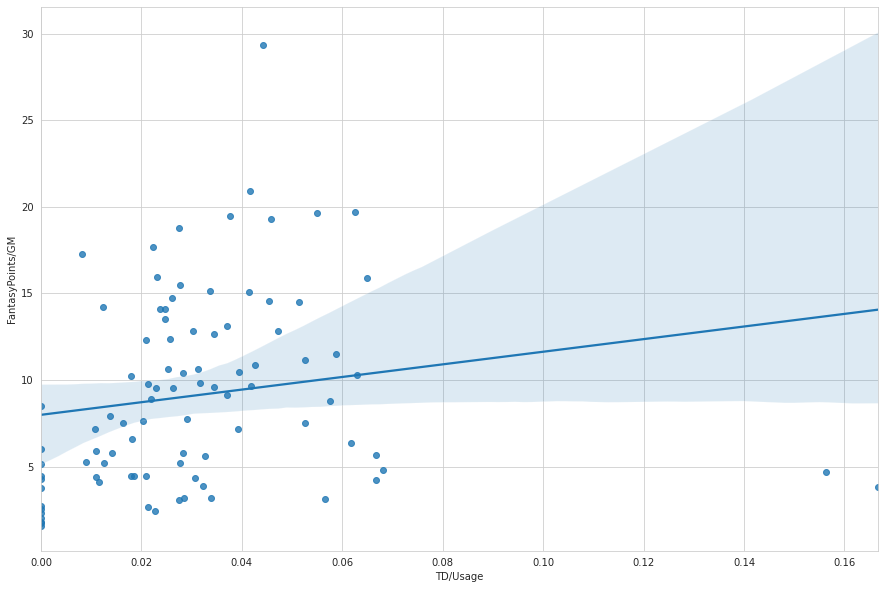

In [50]:
rb_df['TD/Usage']=(rb_df['RushingTD']+rb_df['ReceivingTD'])/(rb_df['RushingAtt']+rb_df['Tgt'])

fig, ax=plt.subplots()
fig.set_size_inches(15,10)

rb_df = rb_df[rb_df['RushingAtt']>20]

plot = sns.regplot(
    x=rb_df['TD/Usage'],
    y= rb_df['FantasyPoints/GM'],
    scatter=True,)

